# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

I will do 4. I'd like to stick using the stocks UA/DL/AA when possible for consistency.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
sns.set_style('darkgrid')

import yfinance as yf

In [6]:
tickers = ['AAL','UAL','DAL']

start_date = dt.datetime.today()-dt.timedelta(days = 999)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end =end_date)

C:\Users\owenc\AppData\Local\Temp\ipykernel_25136\48700479.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  3 of 3 completed


In [7]:
stock.head()

Price       Close                         High                          Low  \
Ticker        AAL        DAL        UAL    AAL        DAL        UAL    AAL   
Date                                                                          
2022-10-03  11.92  27.673527  32.810001  12.23  27.908546  33.099998  11.65   
2022-10-04  12.95  30.111856  35.330002  13.05  30.180403  35.419998  12.30   
2022-10-05  12.87  29.886631  35.419998  12.96  30.111857  35.619999  12.43   
2022-10-06  12.73  29.984556  34.959999  13.00  30.278330  35.680000  12.40   
2022-10-07  12.18  28.780081  33.860001  12.54  29.592856  34.700001  11.95   

Price                              Open                          Volume  \
Ticker            DAL        UAL    AAL        DAL        UAL       AAL   
Date                                                                      
2022-10-03  26.635525  31.580000  12.02  27.399337  32.360001  41156700   
2022-10-04  28.642985  33.950001  12.31  28.642985  33.990002  47616000   
2022-10-05  29.181572  34.310001  12.63  29.377422  34.590000  28172500   
2022-10-06  29.524309  34.250000  12.77  29.661405  35.200001  31569300   
2022-10-07  28.456929  33.430000  12.50  29.573273  34.700001  37297700   

Price                           
Ticker           DAL       UAL  
Date                            
2022-10-03  11053600   8905200  
2022-10-04  16308100  12024900  
2022-10-05   8523000   8573500  
2022-10-06  10688100   9808700  
2022-10-07  11051700   9386400

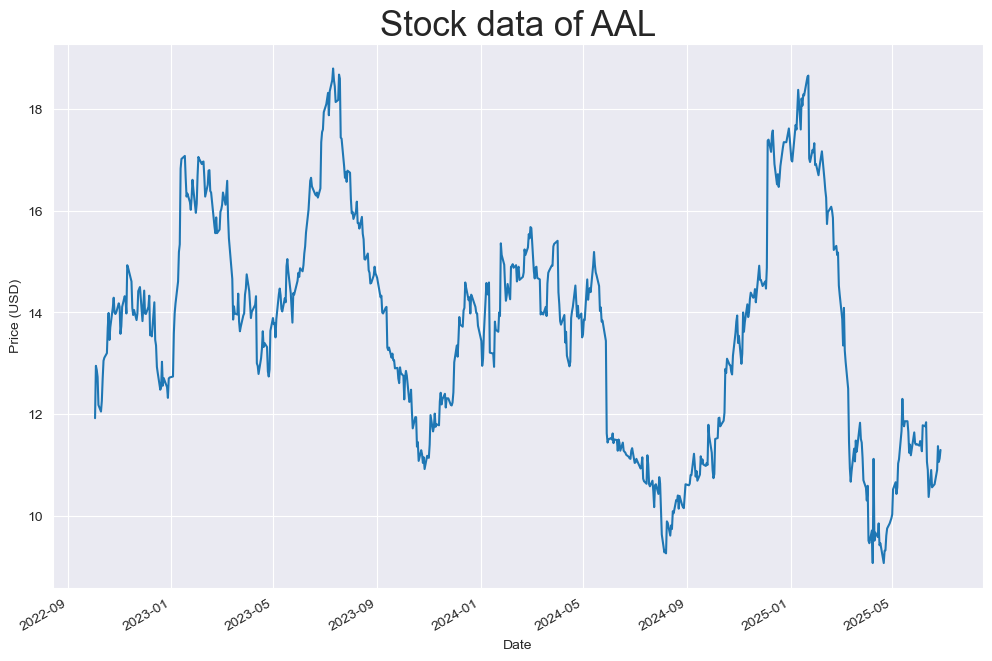

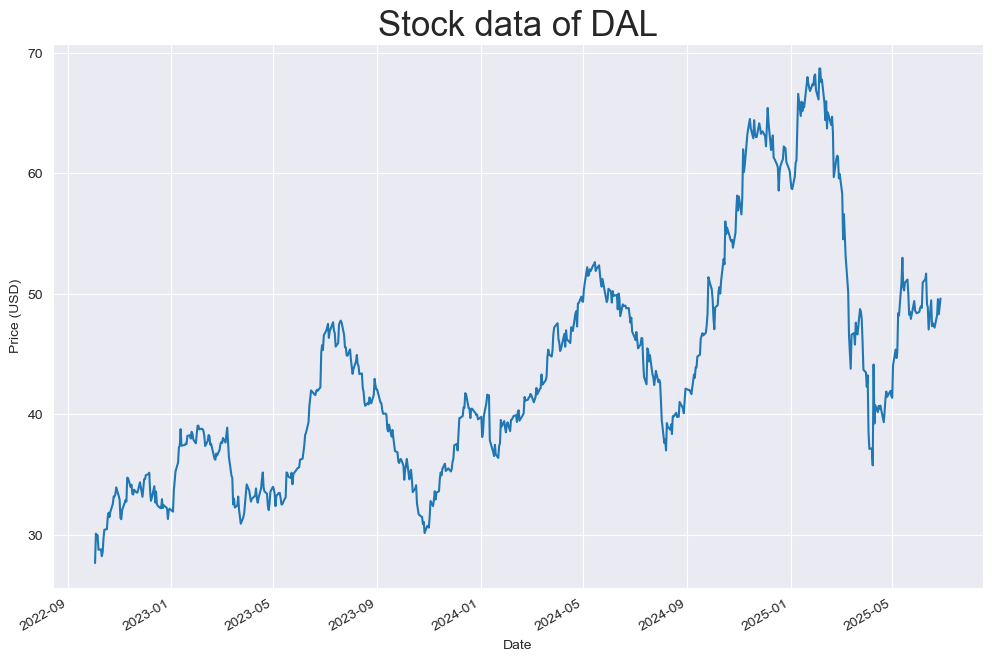

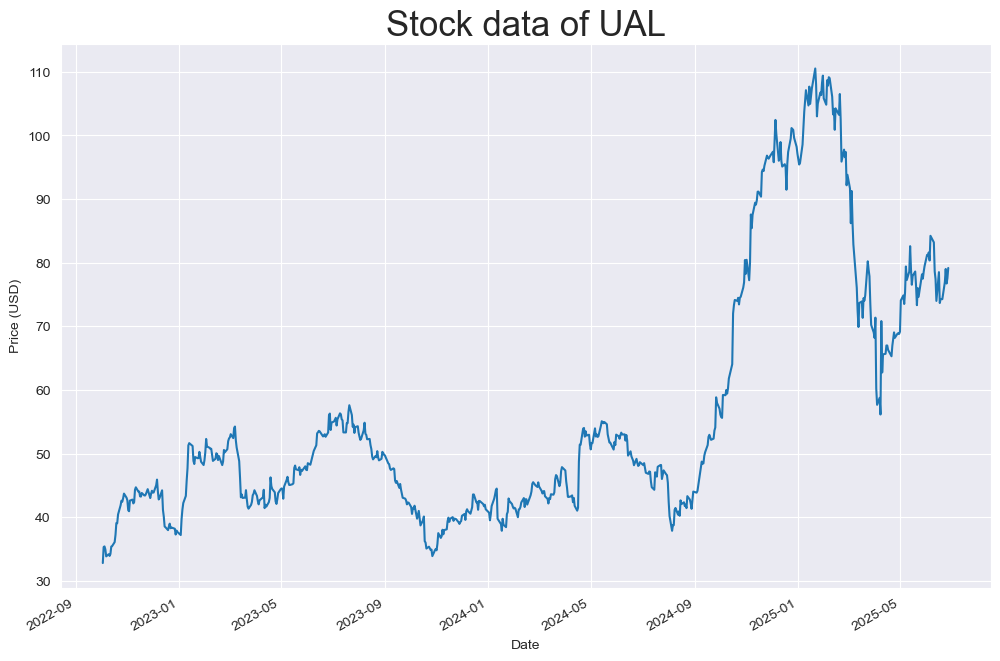

In [8]:
ticker = 'AAL'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

ticker = 'DAL'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

ticker = 'UAL'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

In [9]:
# Use historical data to estimate std deviation of log returns
AA_log_returns = np.log(stock['Close']['AAL']/stock['Close']['AAL'].shift(1))
AA_log_returns = AA_log_returns.dropna()
AA_log_returns_values = AA_log_returns.values
AAsigma = np.std(AA_log_returns_values)

UA_log_returns = np.log(stock['Close']['UAL']/stock['Close']['UAL'].shift(1))
UA_log_returns = UA_log_returns.dropna()
UA_log_returns_values = UA_log_returns.values
UAsigma = np.std(UA_log_returns_values)

DL_log_returns = np.log(stock['Close']['DAL']/stock['Close']['DAL'].shift(1))
DL_log_returns = DL_log_returns.dropna()
DL_log_returns_values = DL_log_returns.values
DLsigma = np.std(DL_log_returns_values)



#Set starting value of simulated stocks to be last closing price of S&P

AAS0 = stock['Close']['AAL'].iloc[-1]
UAS0 = stock['Close']['UAL'].iloc[-1]
DLS0 = stock['Close']['DAL'].iloc[-1]

In [10]:
AA_log_returns_values

array([ 0.08287811, -0.00619676, -0.01093764, -0.04416609, -0.01073061,
        0.01727727,  0.03526003,  0.02718617,  0.00458712,  0.00684154,
        0.037179  ,  0.02094695, -0.03862045,  0.01840317,  0.02804933,
        0.01338516, -0.02050266, -0.00214514,  0.00214514,  0.01277521,
       -0.0049488 , -0.03828563,  0.01098507,  0.02730056,  0.0147734 ,
       -0.00490023, -0.0191292 ,  0.06574493, -0.00335459, -0.01353199,
       -0.00477984, -0.03624087, -0.00998584,  0.00714291, -0.01433715,
        0.00934244,  0.03098843,  0.00553251, -0.04730851,  0.02216754,
        0.02030171, -0.03168169, -0.00071551,  0.00997155,  0.01547149,
       -0.05596868,  0.00368326, -0.0051604 ,  0.04833253, -0.05351962,
       -0.00820591, -0.0319662 , -0.00932407, -0.02609882,  0.00399842,
        0.03912862, -0.03673718,  0.01187189, -0.01426334, -0.01690181,
        0.03037805,  0.0015736 ,  0.00157105,  0.06458761,  0.02900853,
        0.01348977,  0.02987366,  0.03893109,  0.00982652,  0.09

In [11]:
UA_log_returns_values

array([ 7.39991244e-02,  2.54406746e-03, -1.30720561e-02, -3.19701299e-02,
        9.99127165e-03, -7.92607859e-03,  8.80285138e-03,  3.36094241e-02,
        1.97543996e-03,  1.76055199e-02,  3.13591218e-02,  4.84704831e-02,
       -1.27957122e-03,  3.49765034e-02,  3.49890513e-02,  1.70458060e-02,
       -3.52728673e-03,  1.26406388e-02,  1.68381217e-02, -1.47467964e-02,
       -9.79718533e-03, -3.70102937e-02, -3.89958683e-03,  3.99717727e-02,
        3.74707351e-03, -1.41244928e-02,  4.49435714e-03,  4.52211506e-02,
        8.53547971e-03, -1.53259777e-02,  2.27140600e-04, -1.71766500e-02,
       -9.24449225e-04,  1.30930938e-02, -8.93987363e-03,  0.00000000e+00,
        5.96875796e-03,  1.65705657e-02, -3.20246428e-02,  1.54540771e-02,
        1.09265726e-02, -6.35929436e-03,  0.00000000e+00,  2.56424174e-02,
        1.95718049e-02, -4.13483396e-02, -2.90142878e-02,  5.59185236e-03,
        2.74994580e-02, -7.19196038e-02, -2.63334950e-02, -3.94202160e-02,
       -3.11766770e-03, -

In [30]:
DL_log_returns_values

array([ 1.48915262e-02, -4.34649574e-02,  2.85734312e-02,  1.88054848e-02,
       -3.57889908e-02,  2.55200165e-02, -5.78467691e-03, -4.97677325e-02,
       -3.92720516e-02, -3.18778988e-02, -3.50667309e-02,  1.69854325e-02,
        3.41472344e-02, -3.62546856e-02, -1.34514688e-02,  7.10233530e-03,
        8.44426150e-02, -7.50780330e-03,  3.27126247e-03, -4.09990132e-02,
        1.02015340e-03, -1.99113085e-02,  1.27477491e-02,  3.92733236e-02,
        2.27800722e-02,  1.60756034e-03,  3.28622387e-02,  1.08211438e-02,
       -1.14428434e-02,  1.32860746e-02,  2.09575879e-02,  1.87587607e-02,
        0.00000000e+00,  5.58910342e-03,  1.68705374e-02, -2.15748599e-02,
       -8.88115055e-03, -4.78094366e-02, -2.81120313e-03,  2.44101753e-02,
        1.81494036e-02,  6.87084056e-03, -3.87776681e-03,  5.89004132e-02,
       -1.40992978e-03, -2.13897931e-02,  6.03561457e-03, -2.26032213e-02,
       -1.76013562e-03,  1.19659819e-02, -6.98705021e-03,  0.00000000e+00,
        7.56686202e-03,  

In [12]:
len(AA_log_returns_values),len(DL_log_returns_values),len(UA_log_returns_values)

(685, 685, 685)

We now have a robust data set of log-returns for each airline. To depict them, we create normal distributions with the same mean and variance observed by the given airline data.

In [13]:
AAmean=np.mean(AA_log_returns)

In [14]:
UAmean=np.mean(UA_log_returns)

In [15]:
DLmean=np.mean(DL_log_returns)

In [19]:
AAnormals=[]
for i in range(len(AA_log_returns_values)):
    AAnormals.append(np.random.normal(AAmean,AAsigma))

UAnormals=[]
for i in range(len(DL_log_returns_values)):
    UAnormals.append(np.random.normal(UAmean,UAsigma))

DLnormals=[]
for i in range(len(UA_log_returns_values)):
    DLnormals.append(np.random.normal(DLmean,DLsigma))


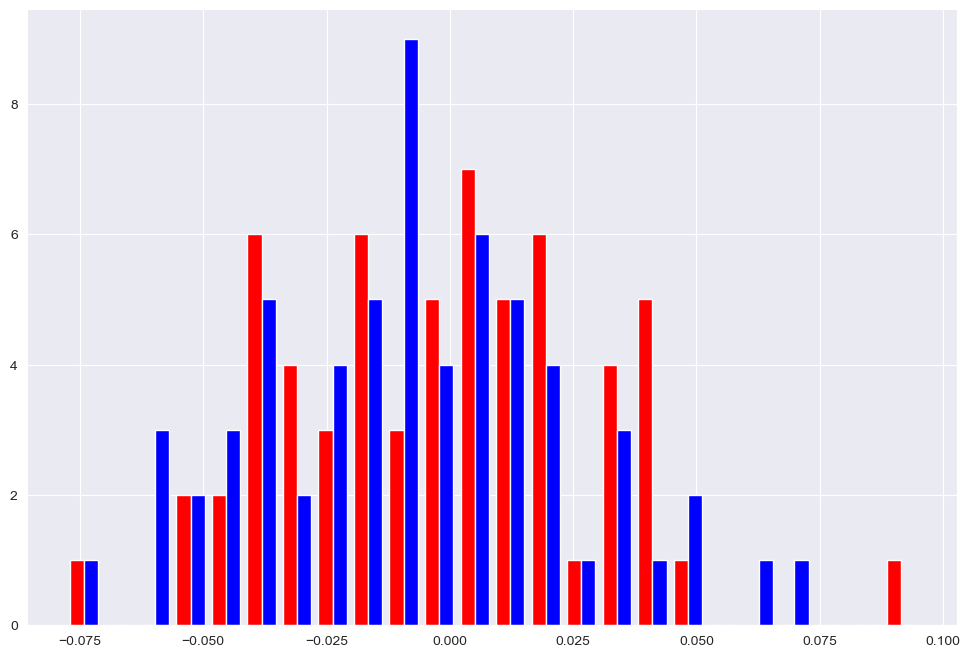

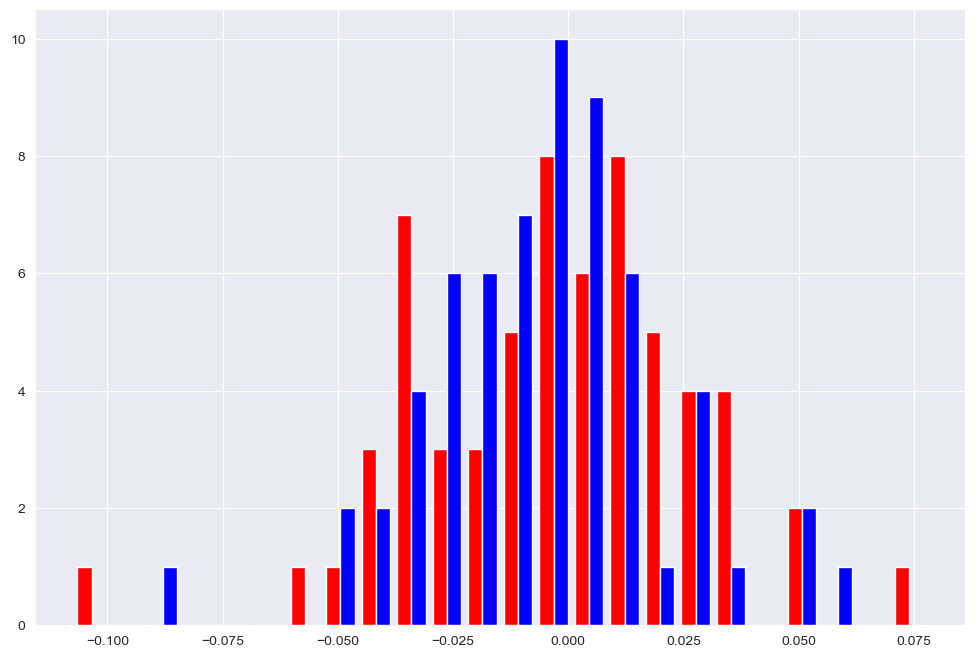

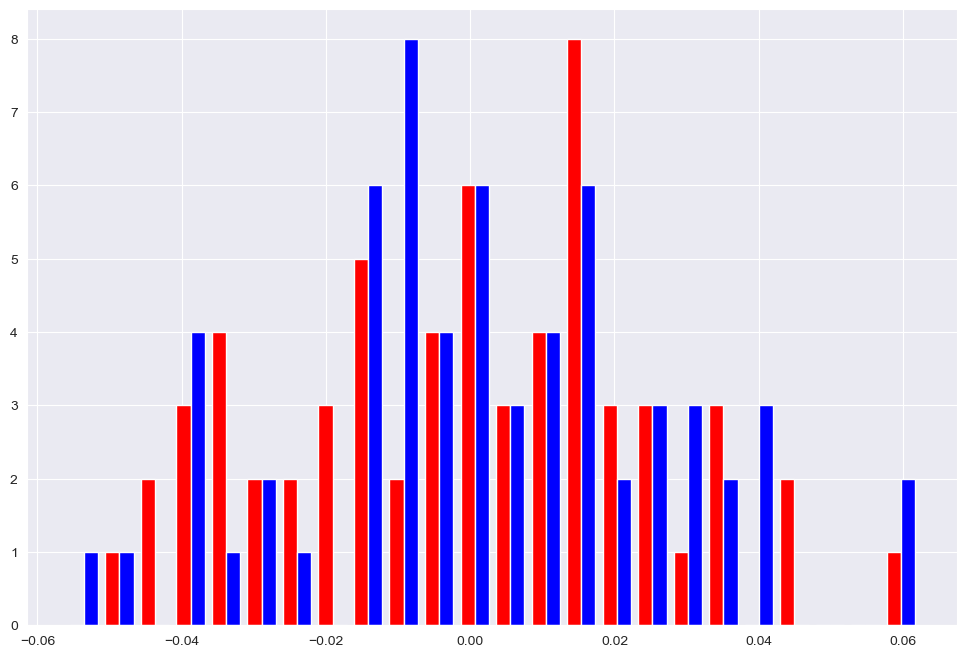

In [20]:
aafig, aaax = plt.subplots(figsize=(12,8))

aaax.hist([AA_log_returns_values,AAnormals],24,color=['red','blue'])
plt.show()

uafig, uaax = plt.subplots(figsize=(12,8))

uaax.hist([UA_log_returns_values,UAnormals],24,color=['red','blue'])
plt.show()

dlfig, dlax = plt.subplots(figsize=(12,8))

dlax.hist([DL_log_returns_values,DLnormals],24,color=['red','blue'])
plt.show()
#red is the log returns, blue is normal distribution

From what I can tell, the log-returns seem generally further skewed toward the center than what would be considered normal (low kurtosis), despite the given standard deviation. This is likely due to a few outliers. American is worst, Delta is best, at looking normal.

Is there a period of 91 days (on average, 62 trading days) for which it is more normalized? We will split the data for the past 1092 days (almost exactly 3 years) into 12 "seasons" and investigate.

C:\Users\owenc\AppData\Local\Temp\ipykernel_25136\318218422.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  3 of 3 completed


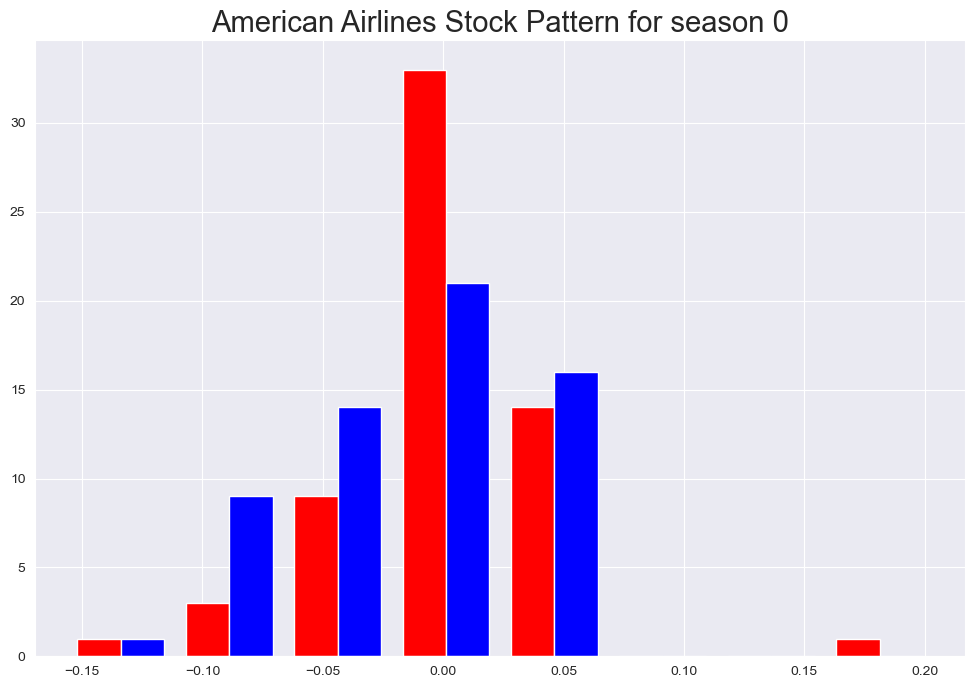

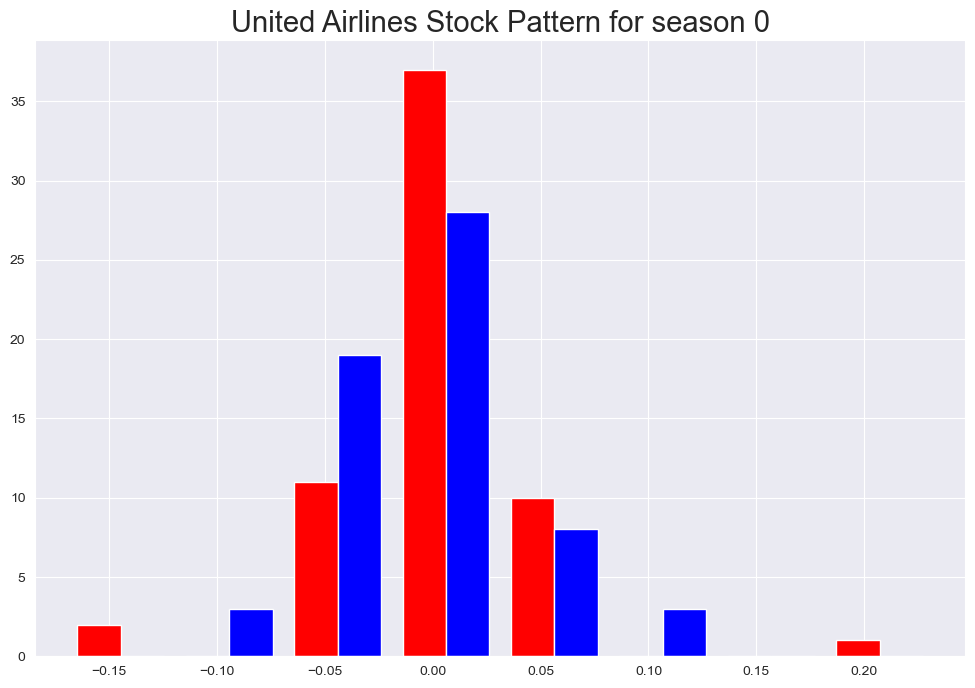

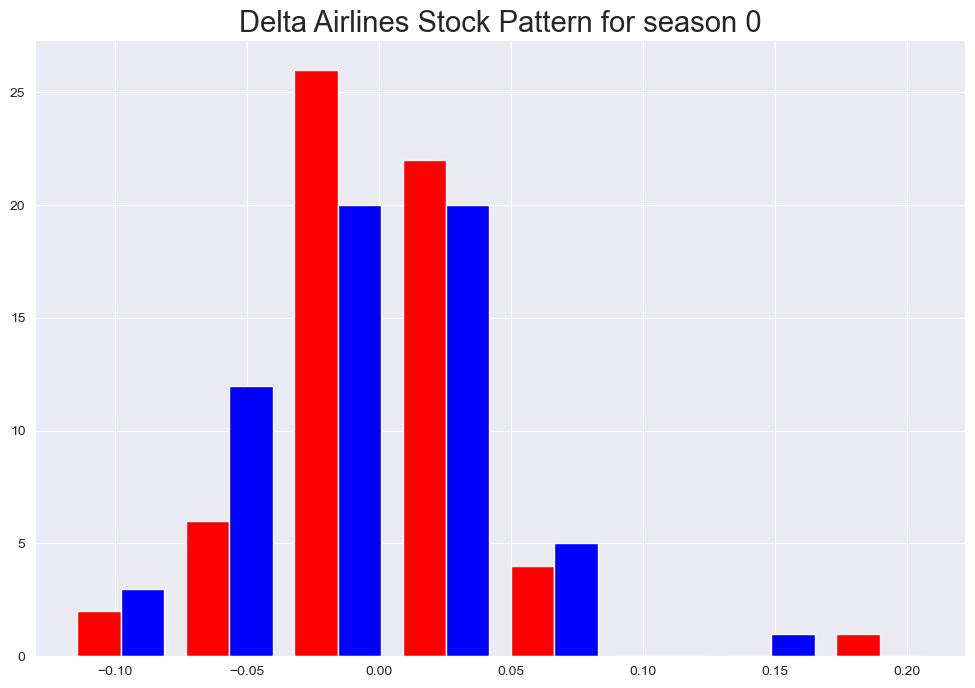

C:\Users\owenc\AppData\Local\Temp\ipykernel_25136\318218422.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  3 of 3 completed


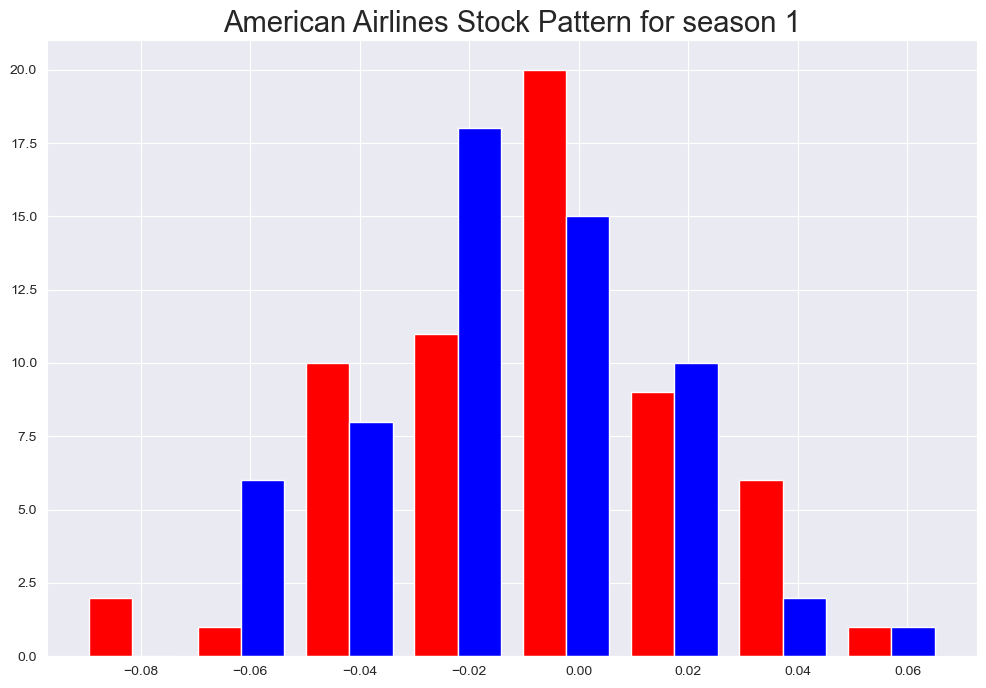

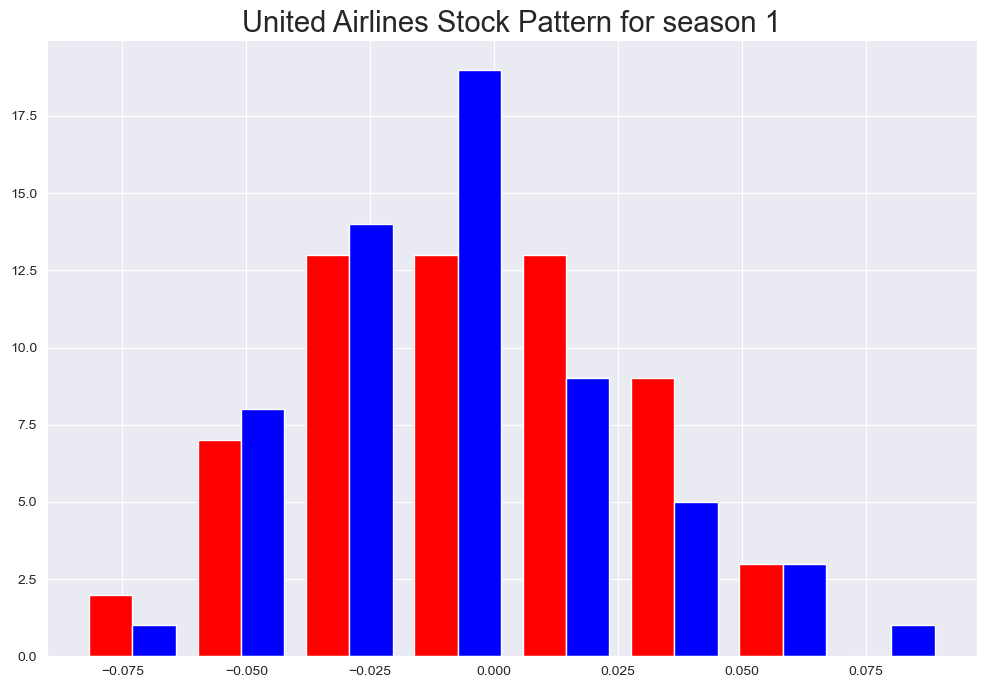

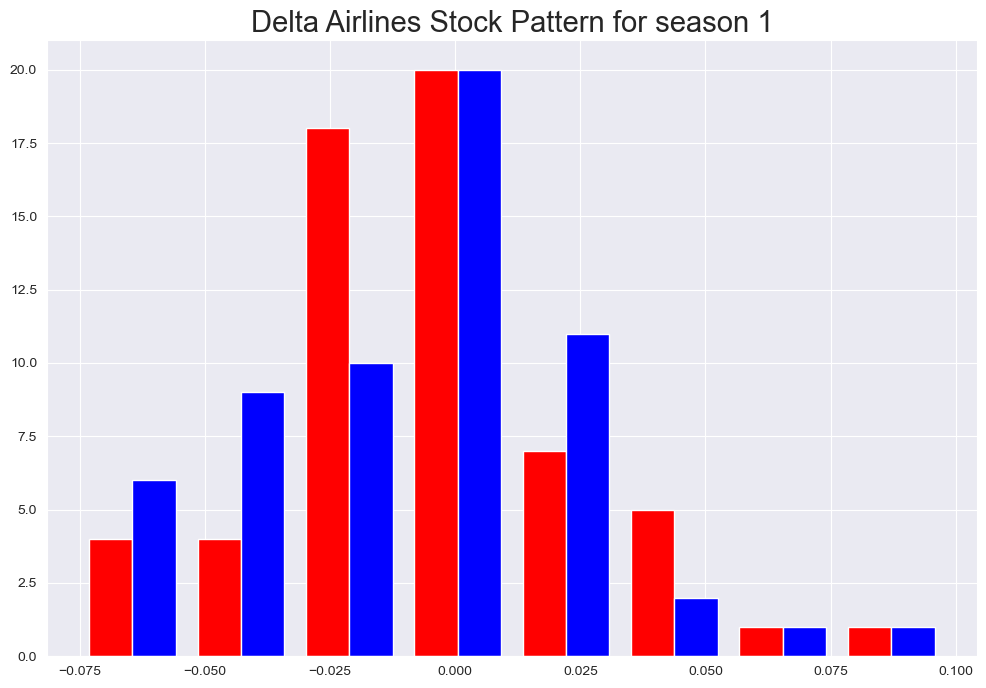

C:\Users\owenc\AppData\Local\Temp\ipykernel_25136\318218422.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  3 of 3 completed


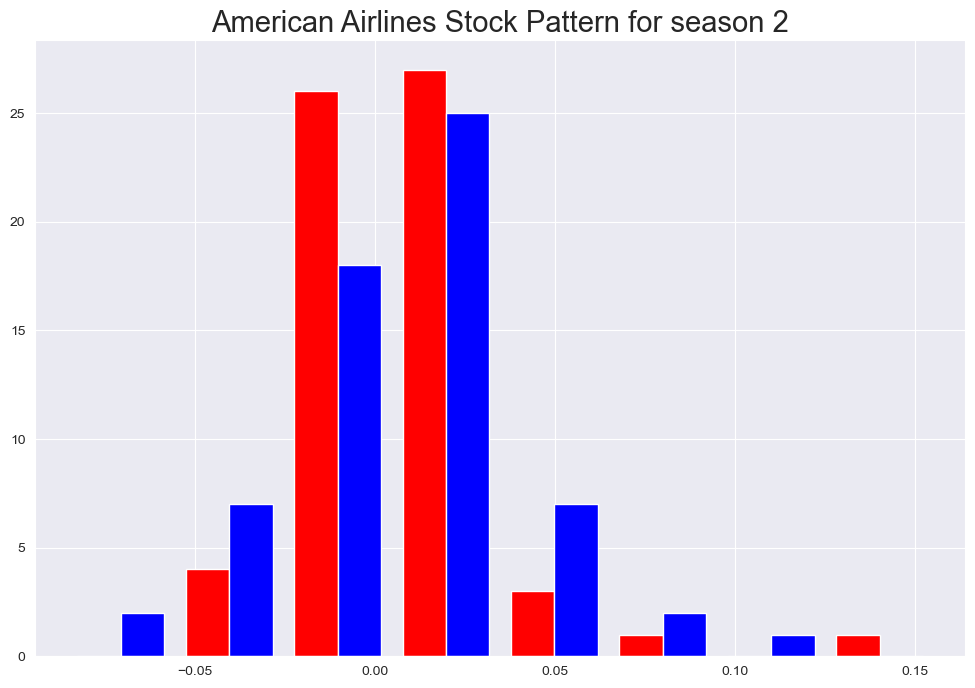

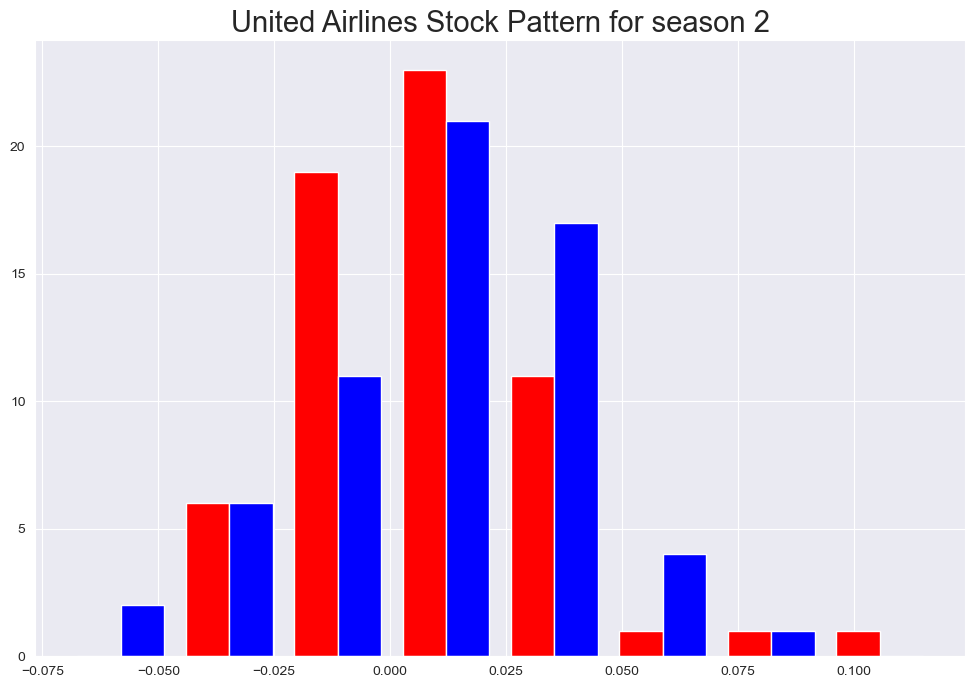

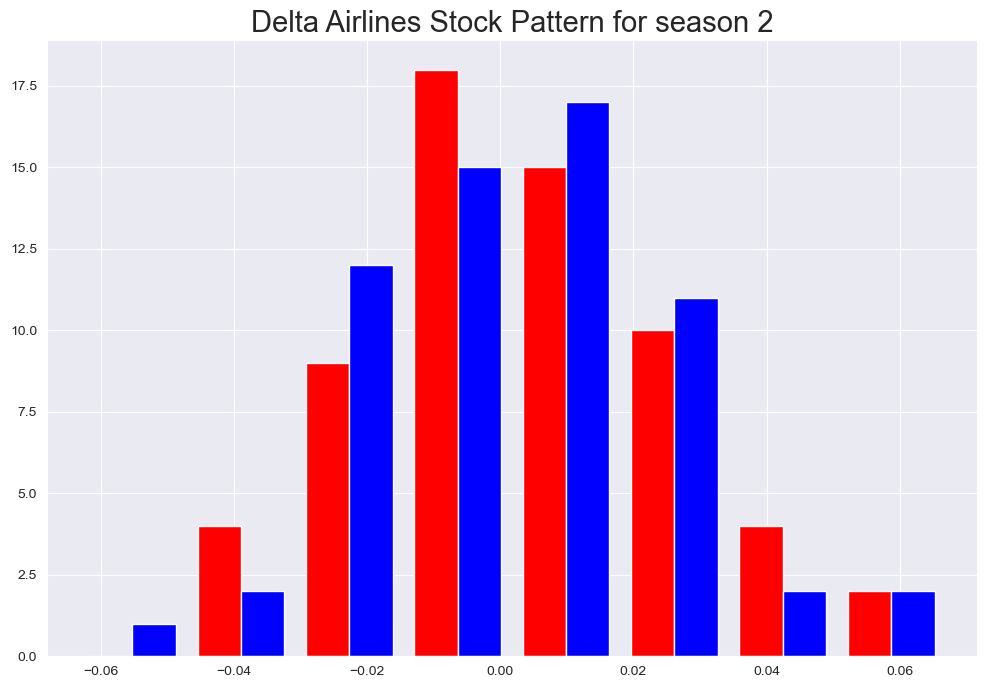

C:\Users\owenc\AppData\Local\Temp\ipykernel_25136\318218422.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  3 of 3 completed


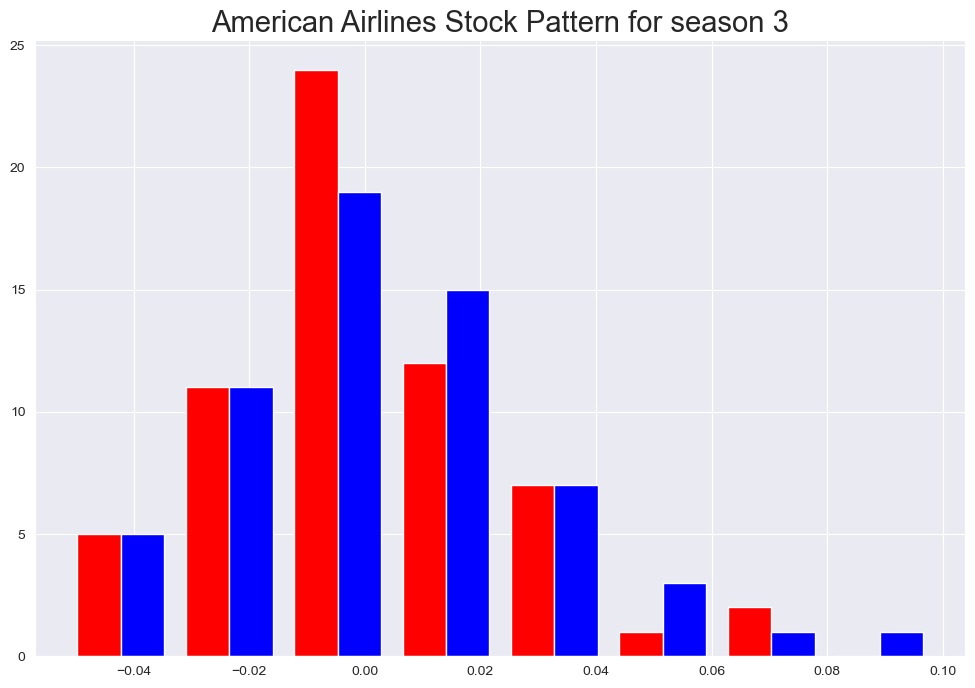

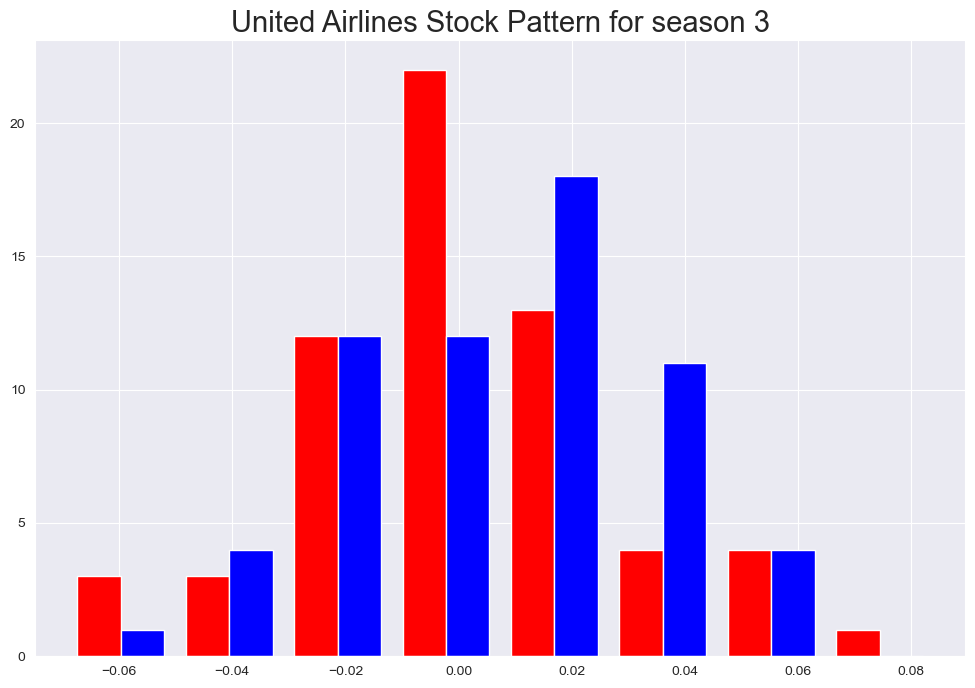

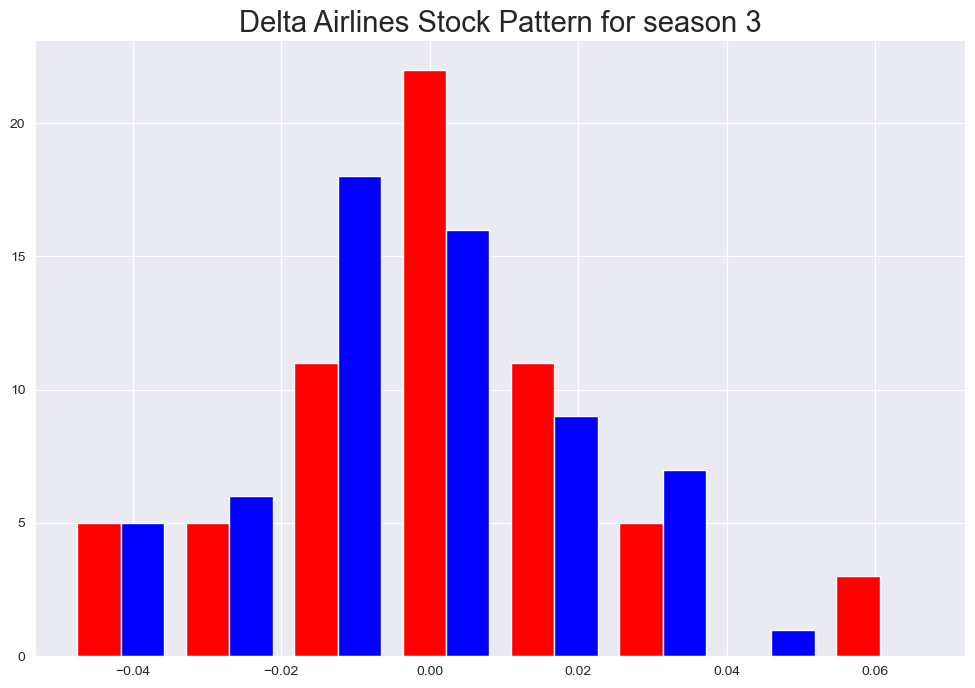

C:\Users\owenc\AppData\Local\Temp\ipykernel_25136\318218422.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  3 of 3 completed


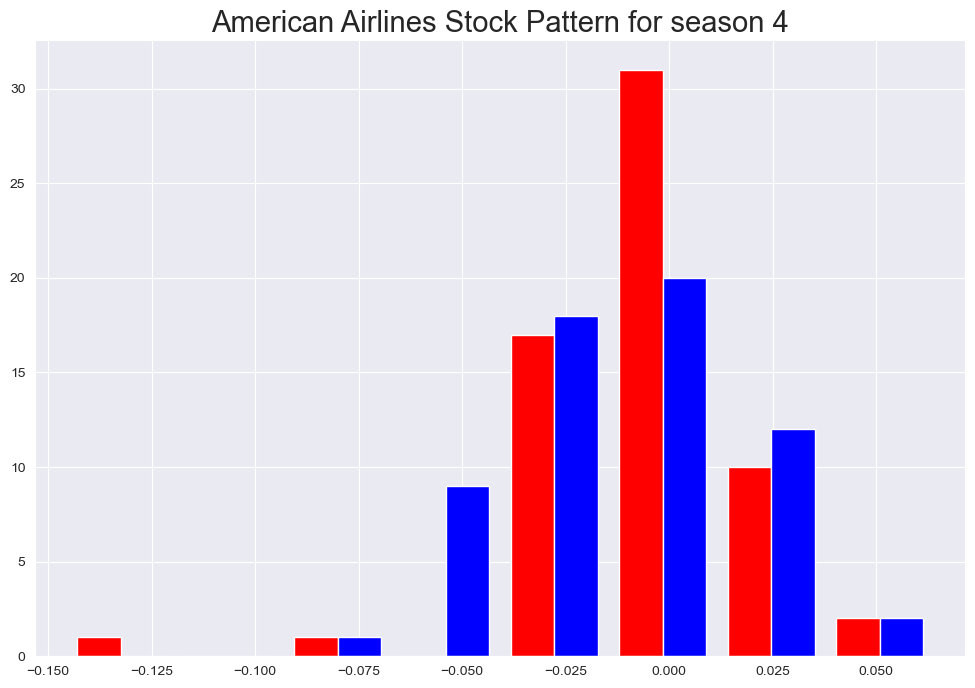

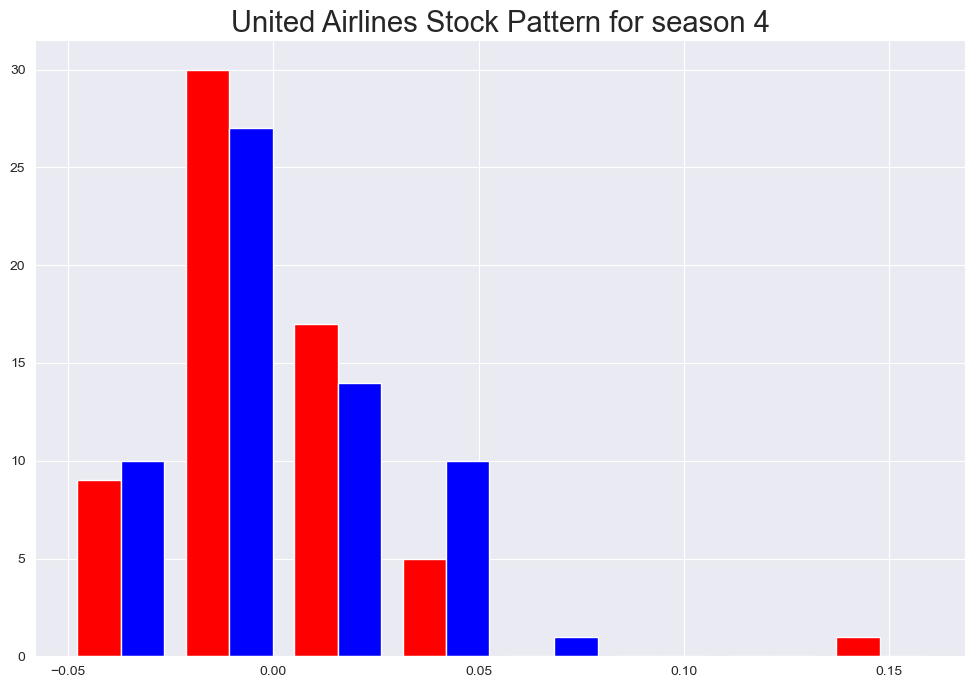

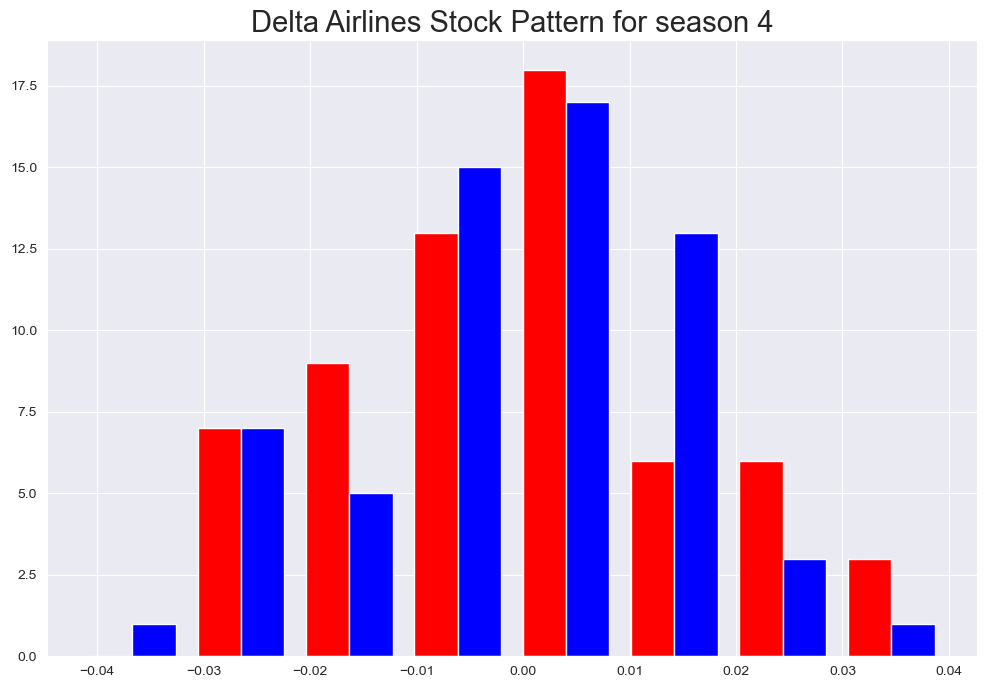

C:\Users\owenc\AppData\Local\Temp\ipykernel_25136\318218422.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  3 of 3 completed


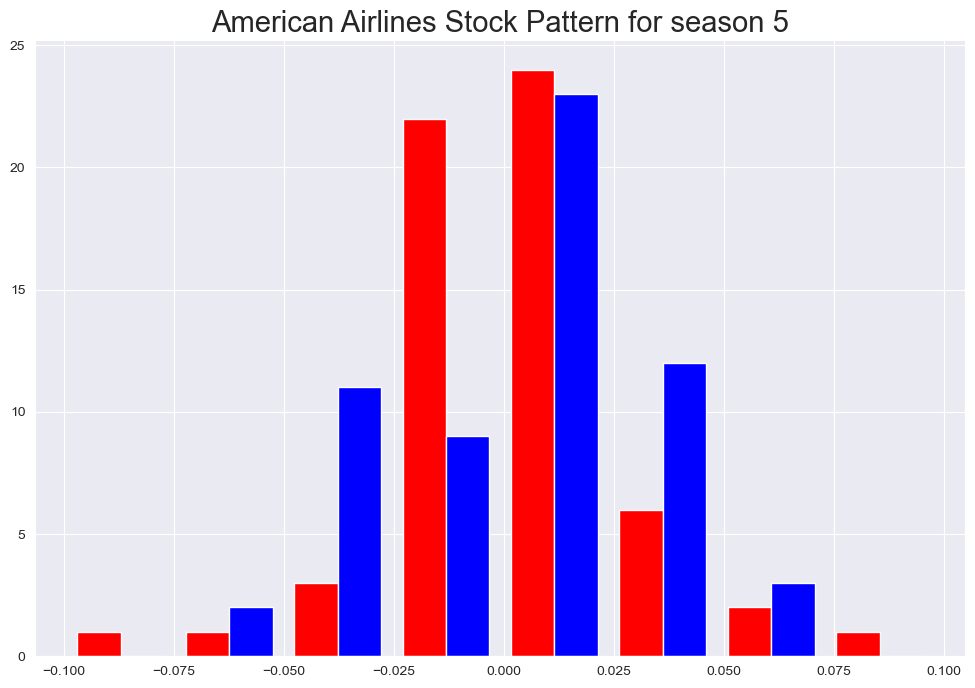

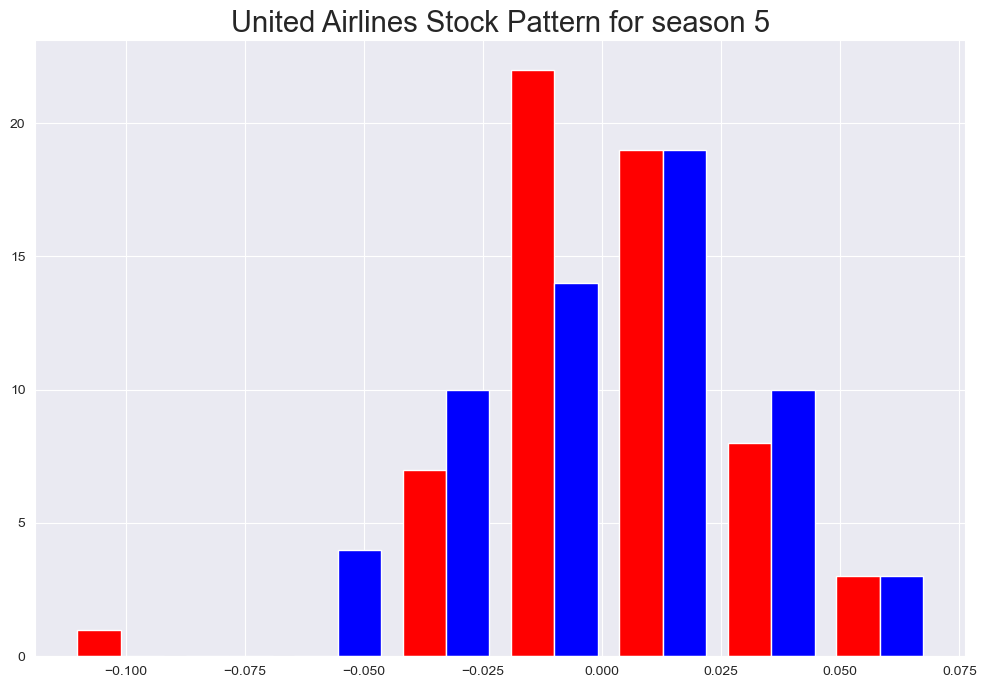

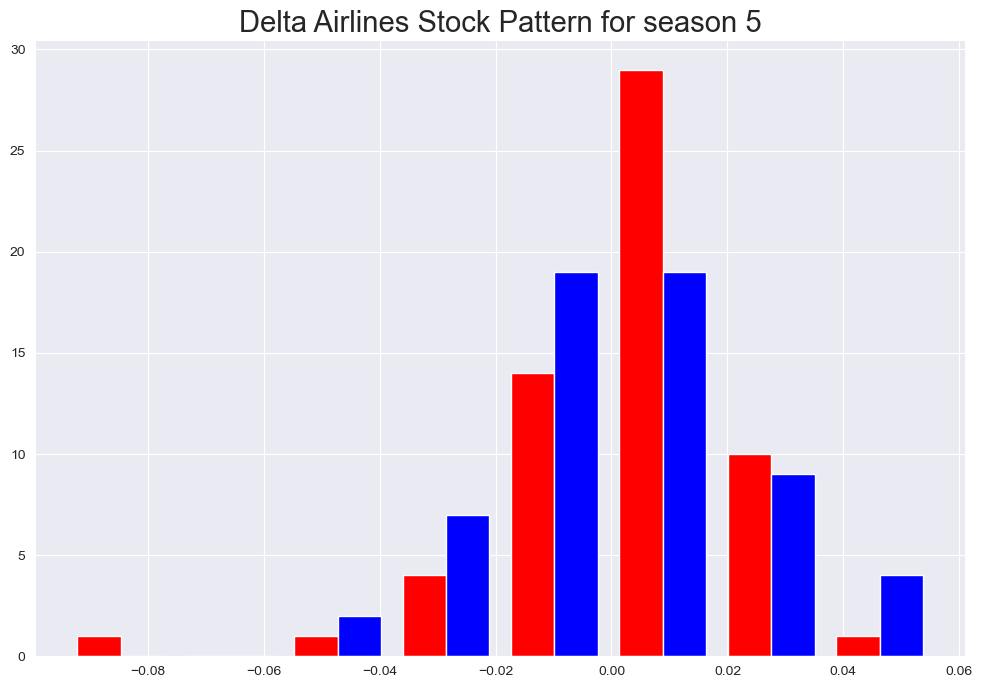

C:\Users\owenc\AppData\Local\Temp\ipykernel_25136\318218422.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  3 of 3 completed


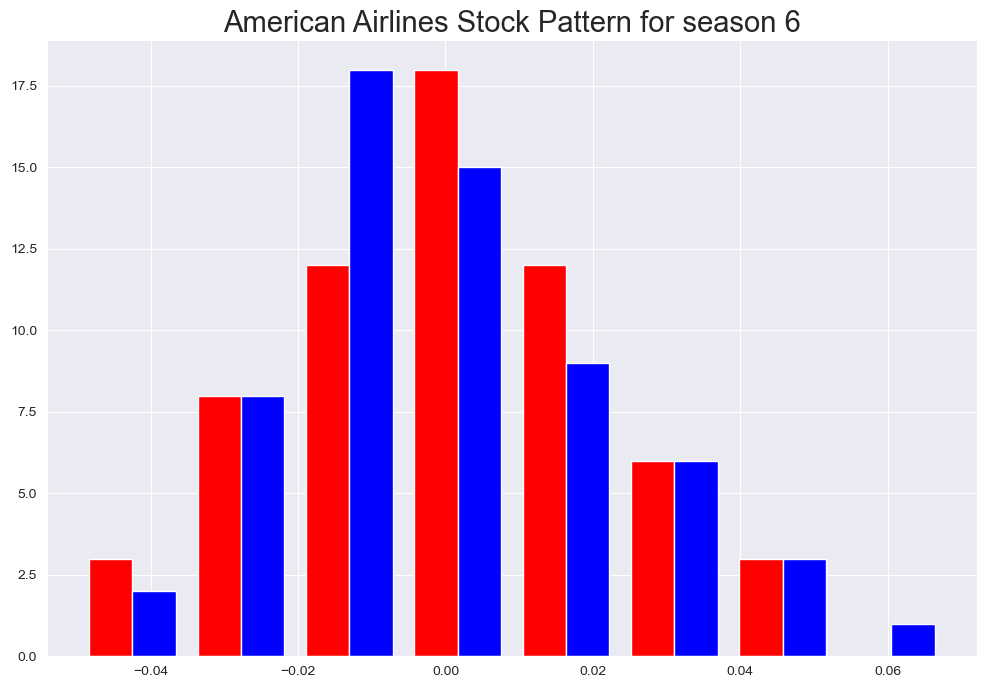

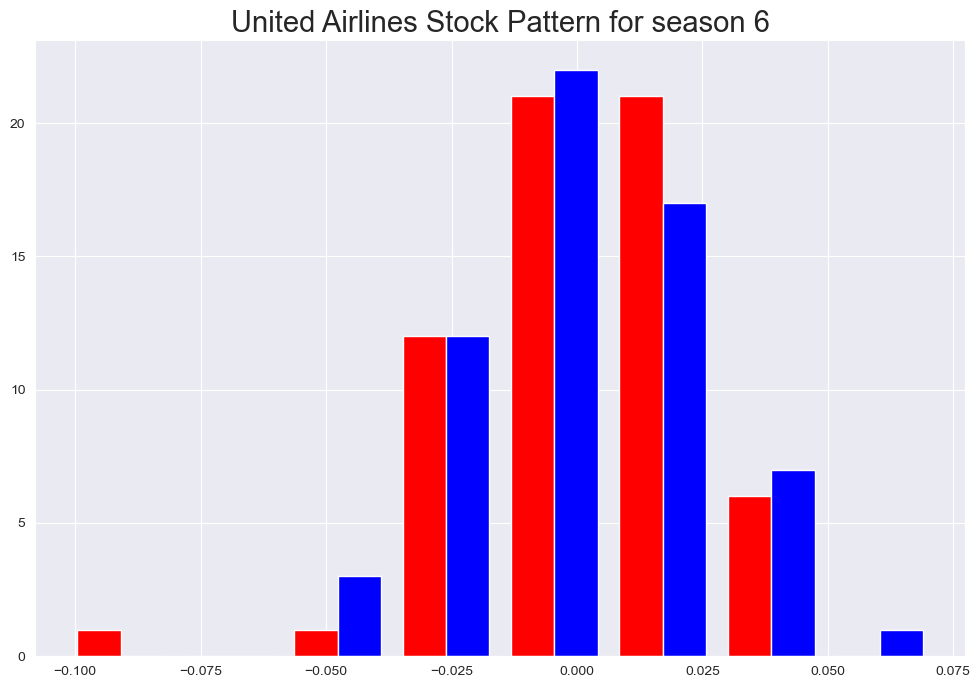

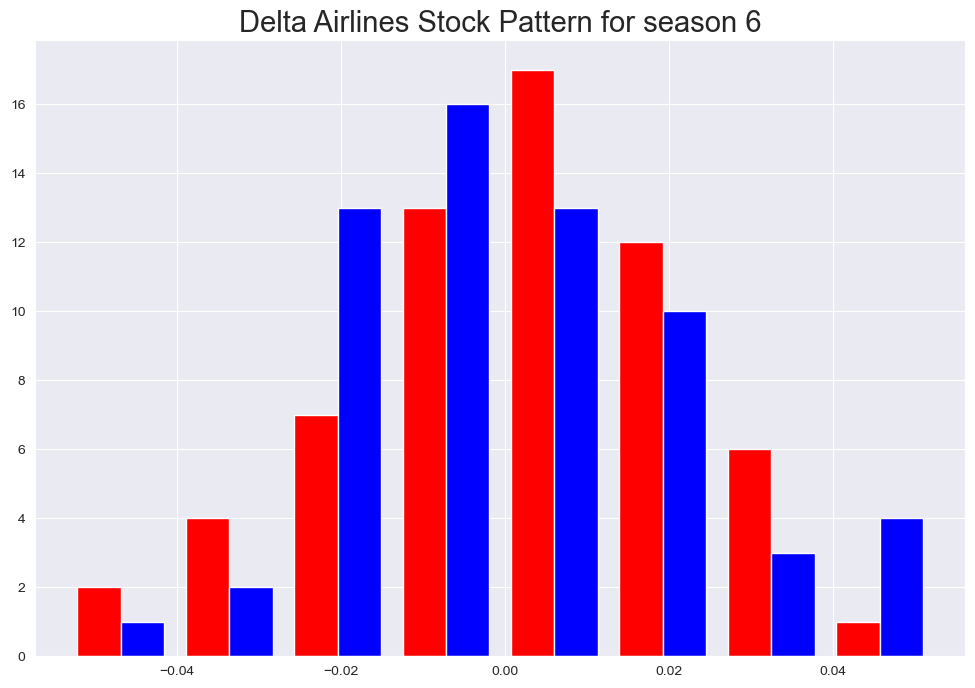

C:\Users\owenc\AppData\Local\Temp\ipykernel_25136\318218422.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  3 of 3 completed


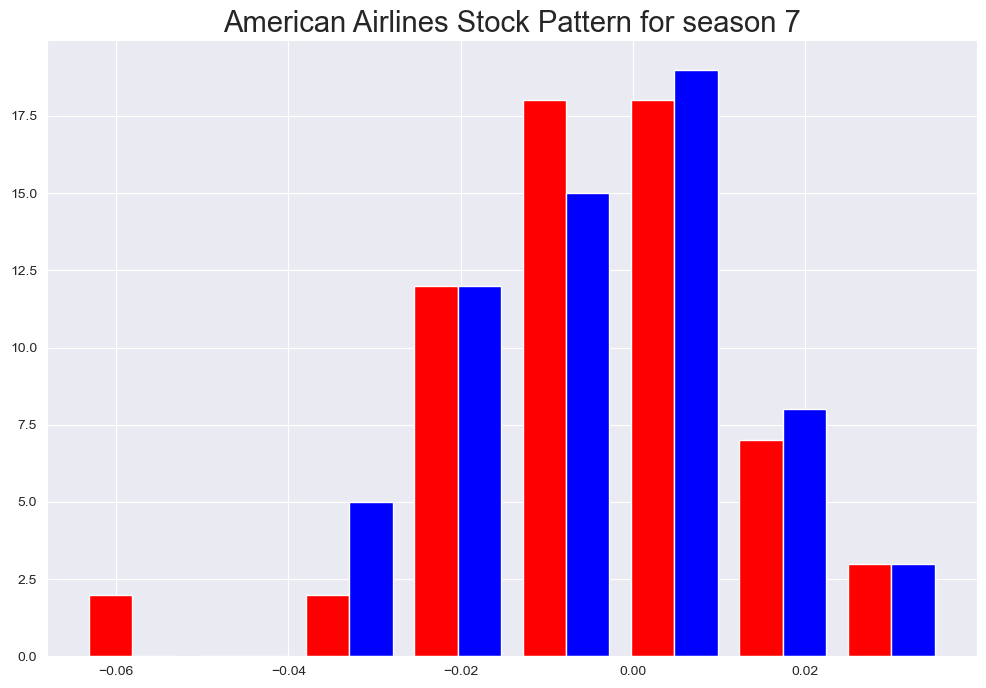

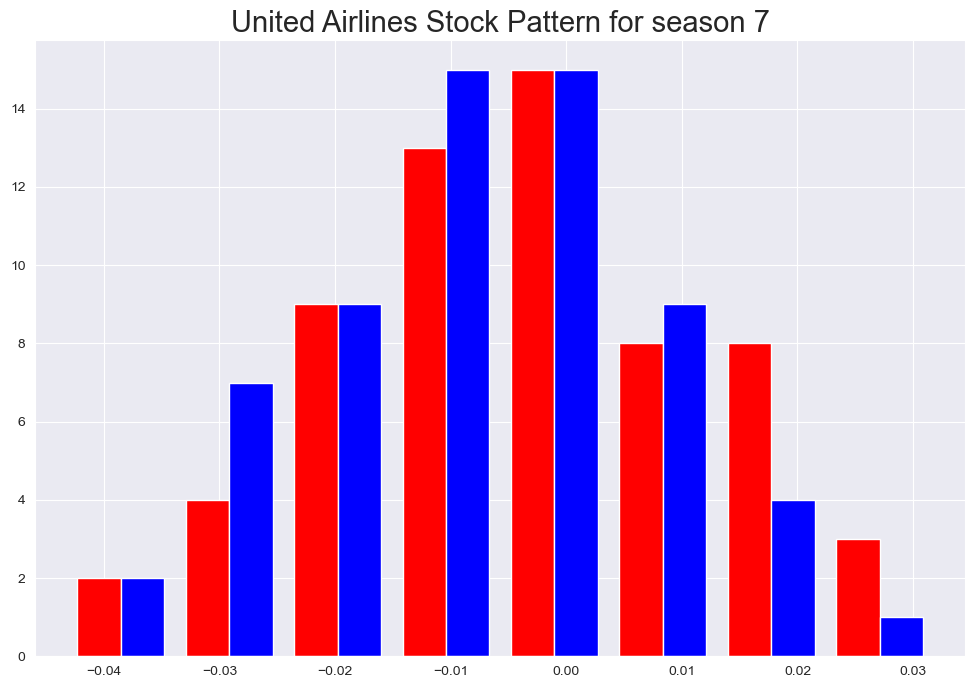

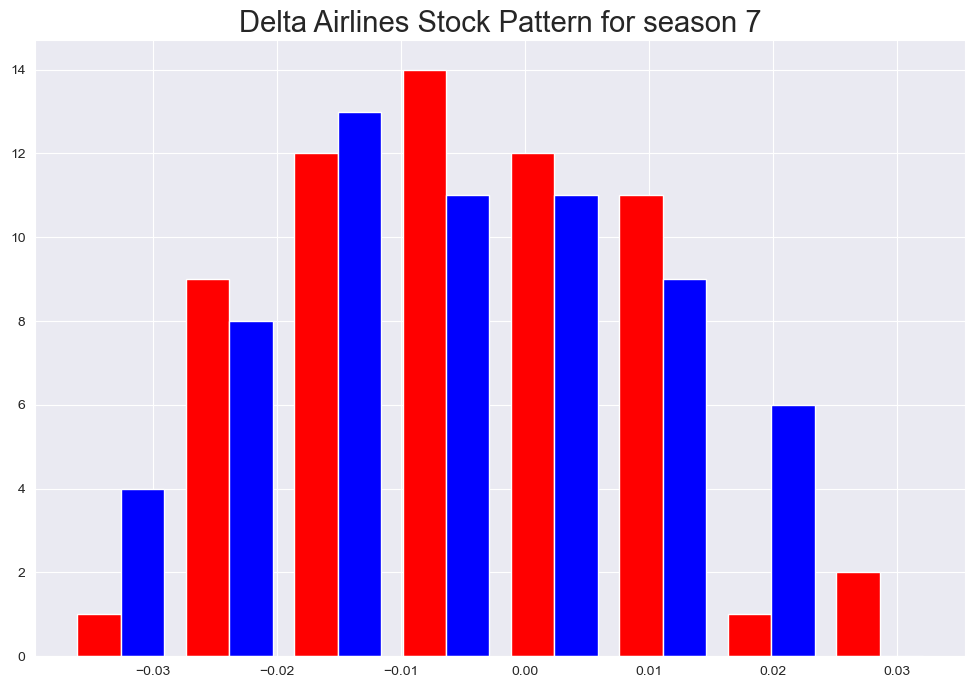

C:\Users\owenc\AppData\Local\Temp\ipykernel_25136\318218422.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  3 of 3 completed


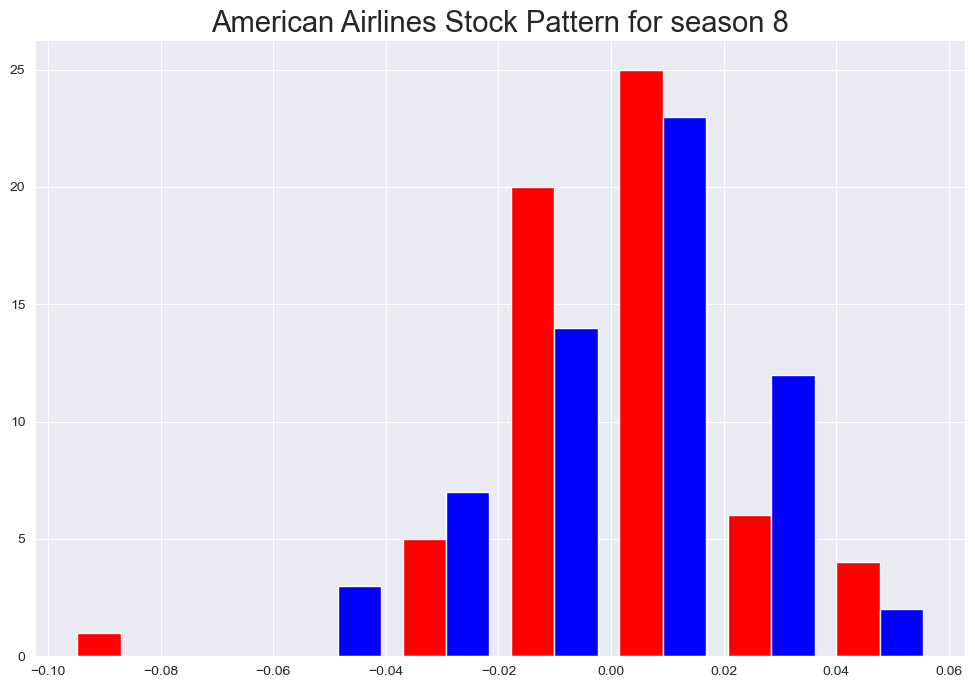

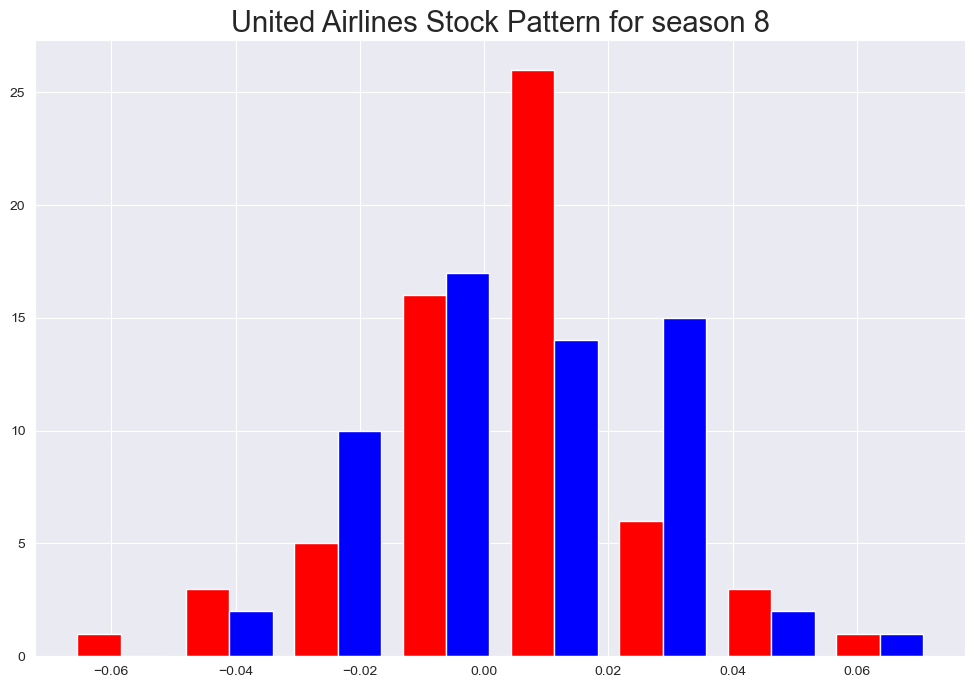

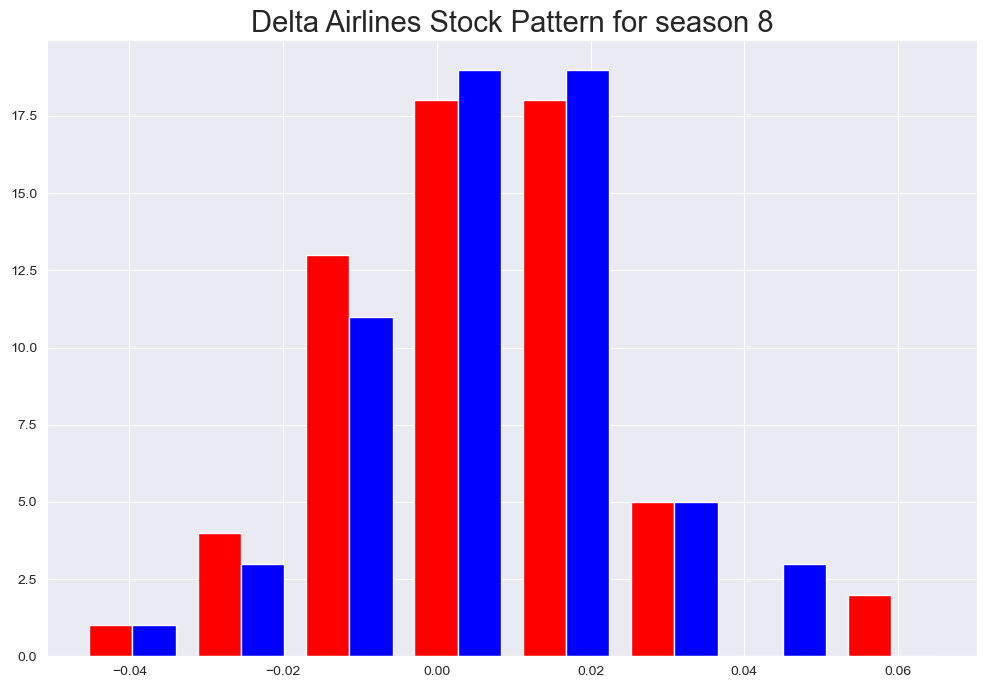

C:\Users\owenc\AppData\Local\Temp\ipykernel_25136\318218422.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  3 of 3 completed


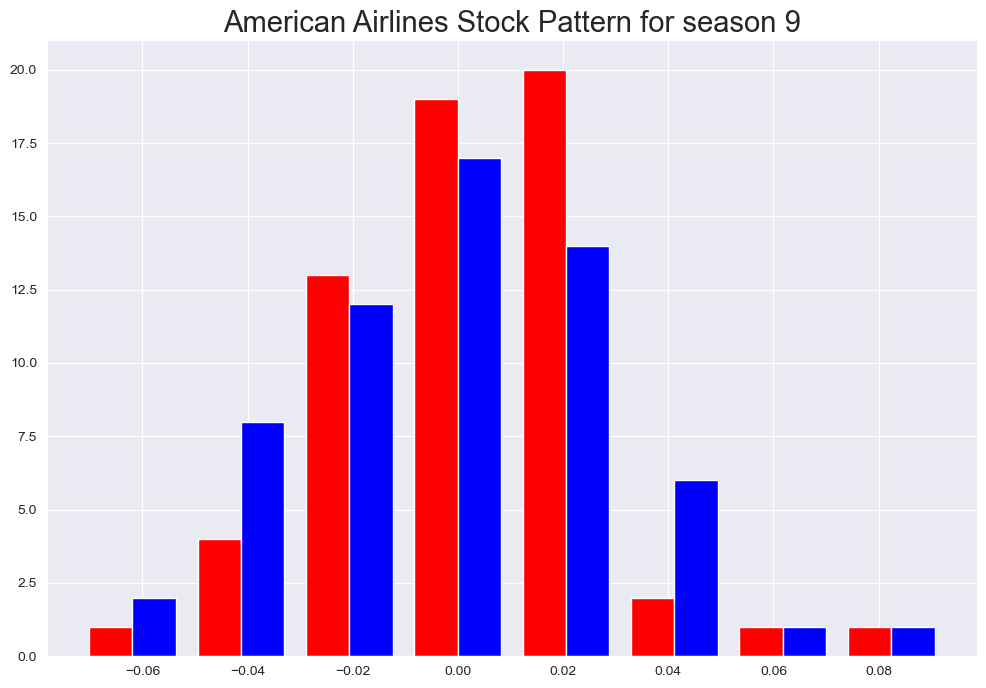

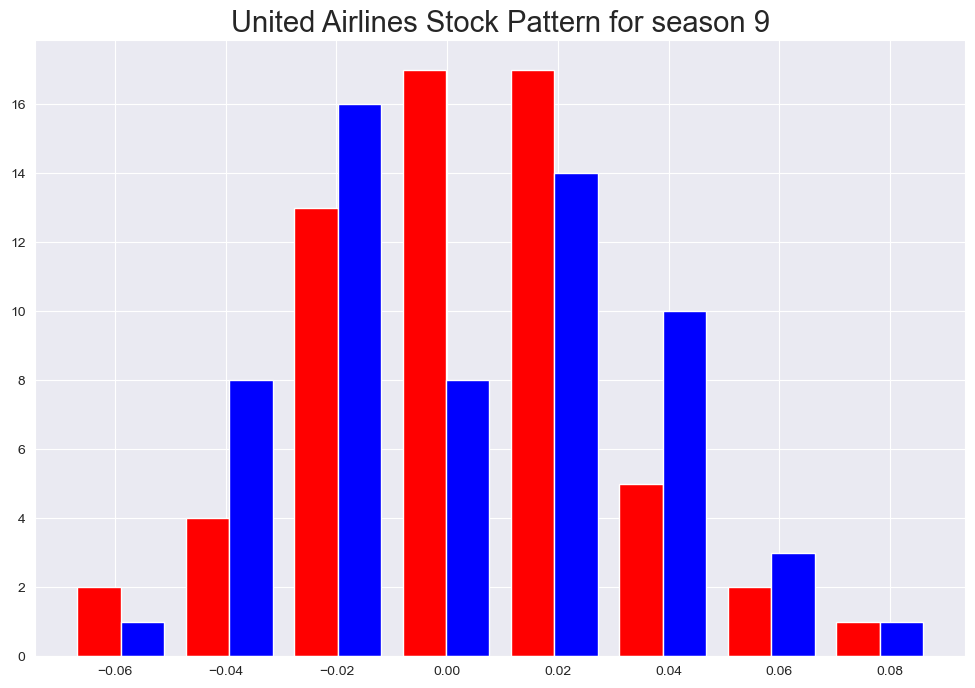

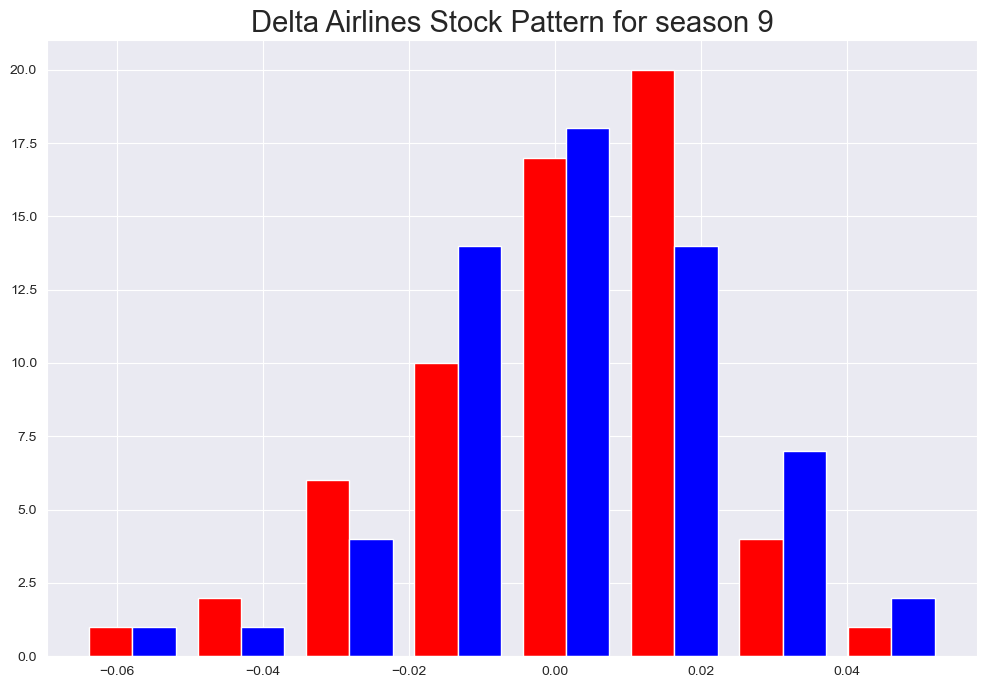

C:\Users\owenc\AppData\Local\Temp\ipykernel_25136\318218422.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  3 of 3 completed


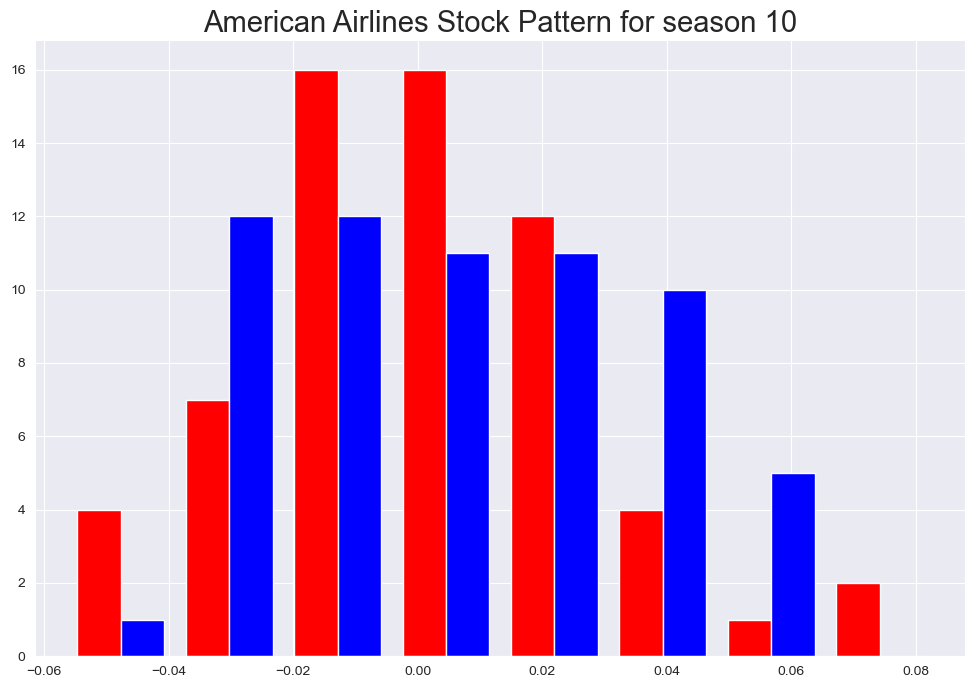

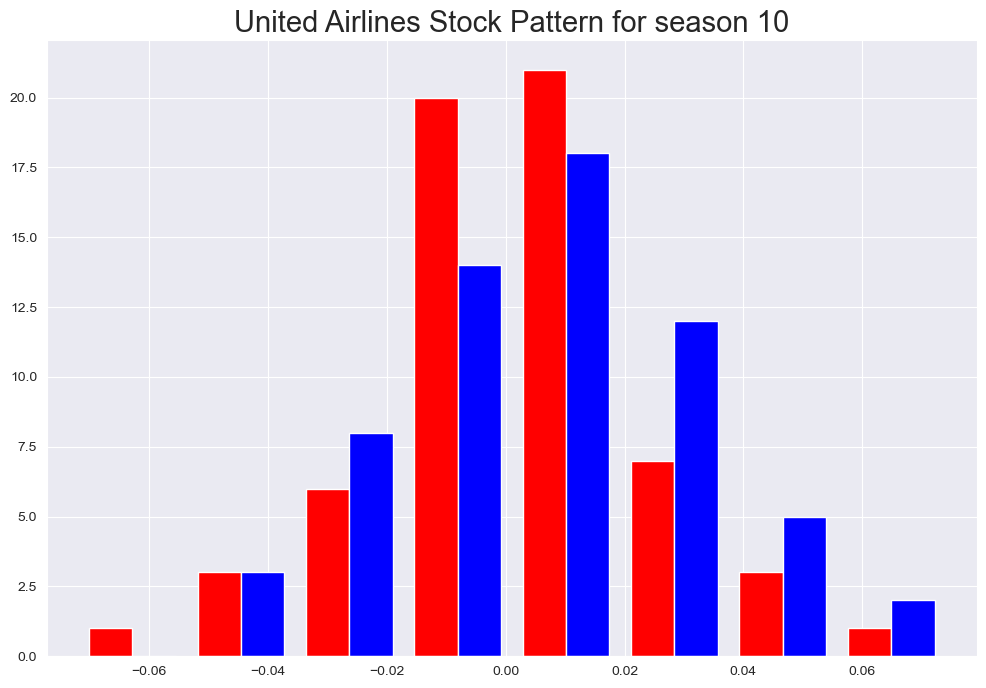

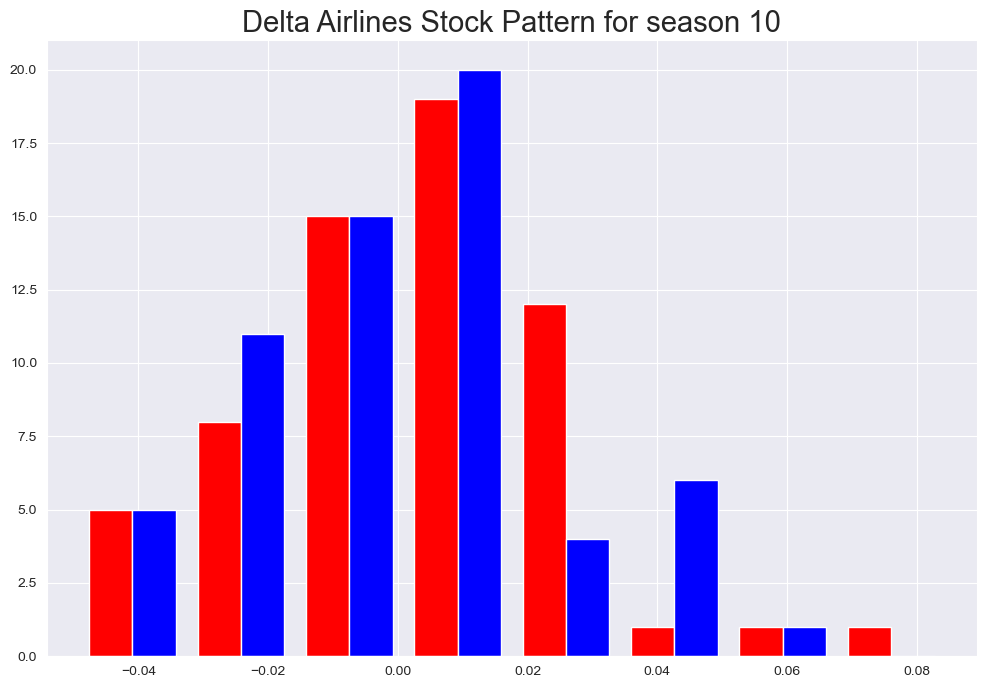

C:\Users\owenc\AppData\Local\Temp\ipykernel_25136\318218422.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  3 of 3 completed


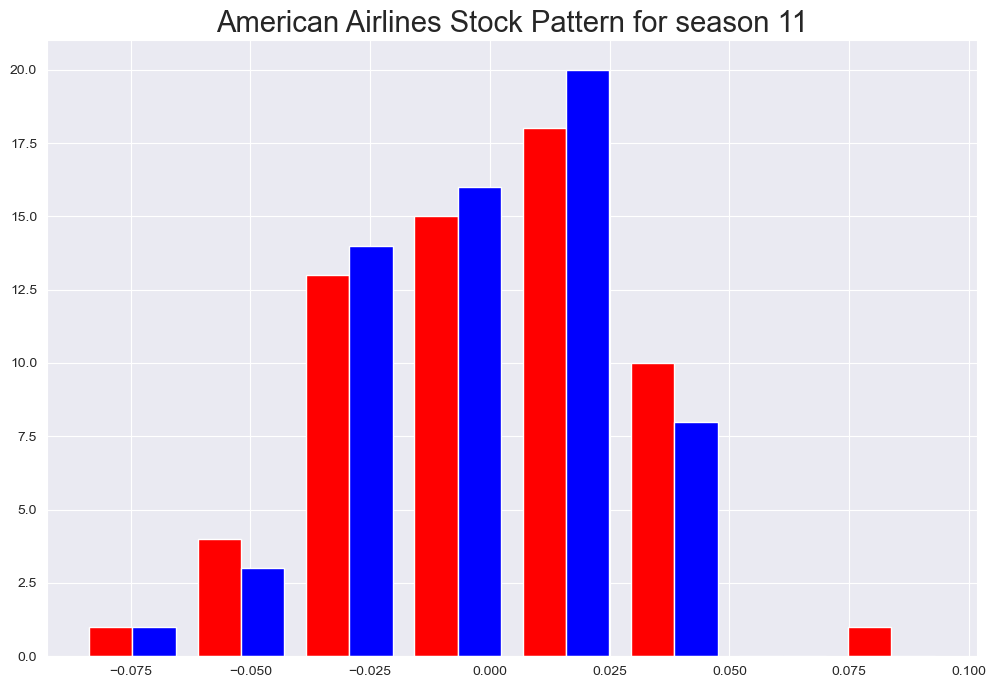

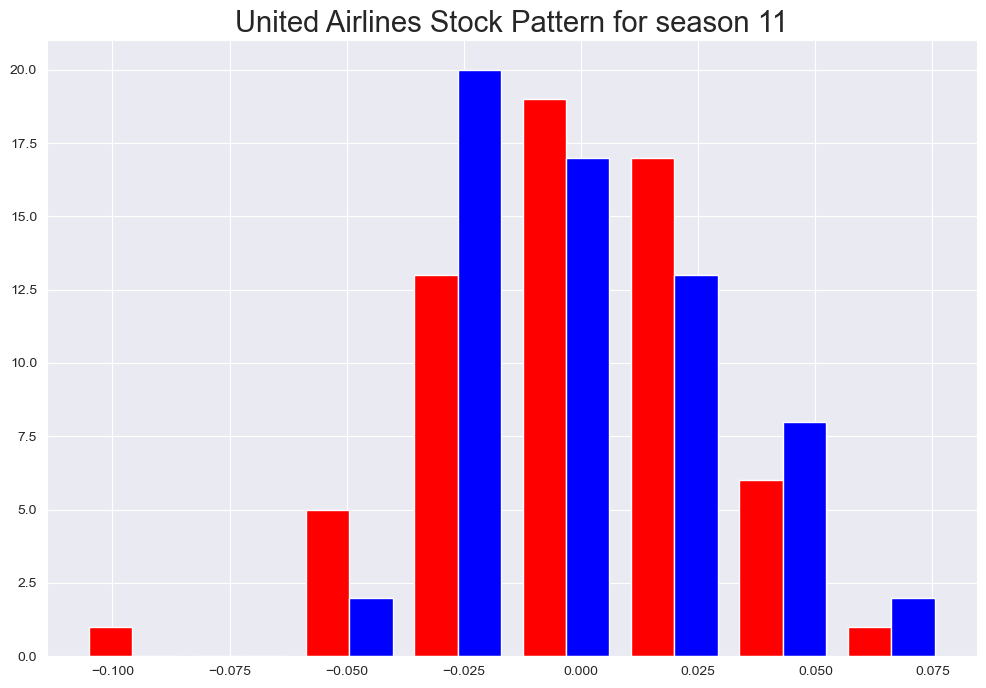

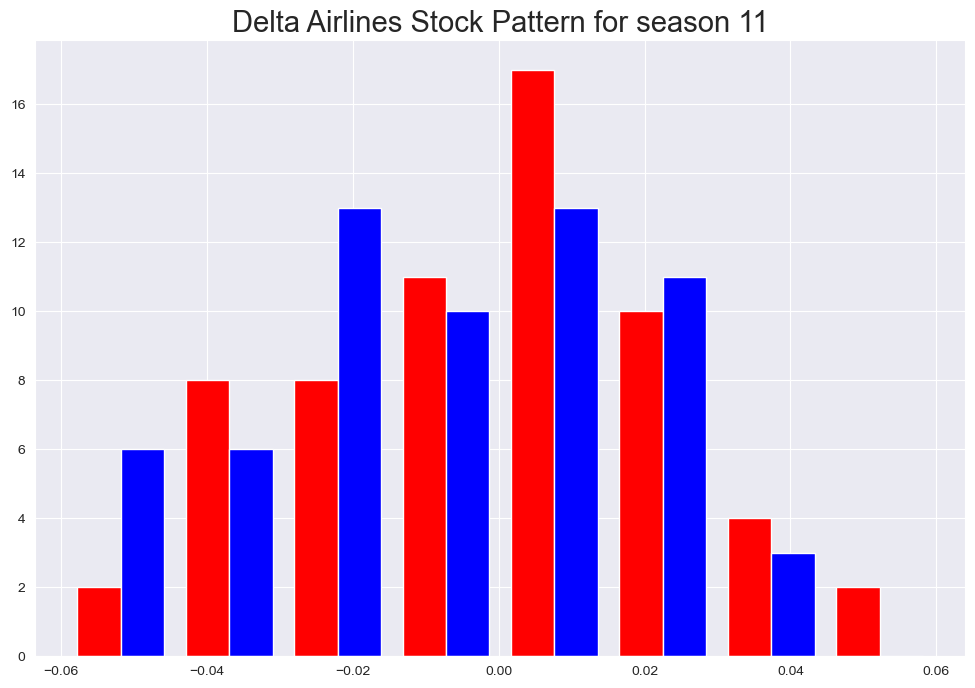

In [18]:
tickers = ['AAL','UAL','DAL']

for n in range(0,12):

    start_date = dt.datetime.today()-dt.timedelta(days = 91*(n+1))
    end_date = dt.datetime.today()-dt.timedelta(days=91*n)
    
    stock = yf.download(tickers, start = start_date, end =end_date)
    
    AA_log_returns = np.log(stock['Close']['AAL']/stock['Close']['AAL'].shift(1))
    AA_log_returns = AA_log_returns.dropna()
    AA_log_returns_values = AA_log_returns.values
    AAsigma = np.std(AA_log_returns_values)
    
    UA_log_returns = np.log(stock['Close']['UAL']/stock['Close']['UAL'].shift(1))
    UA_log_returns = UA_log_returns.dropna()
    UA_log_returns_values = UA_log_returns.values
    UAsigma = np.std(UA_log_returns_values)
    
    DL_log_returns = np.log(stock['Close']['DAL']/stock['Close']['DAL'].shift(1))
    DL_log_returns = DL_log_returns.dropna()
    DL_log_returns_values = DL_log_returns.values
    DLsigma = np.std(DL_log_returns_values)
    
    
    
    #Set starting value of simulated stocks to be last closing price of S&P
    
    AAS0 = stock['Close']['AAL'].iloc[-1]
    UAS0 = stock['Close']['UAL'].iloc[-1]
    DLS0 = stock['Close']['DAL'].iloc[-1]
    
    AAmean=np.mean(AA_log_returns)
    UAmean=np.mean(UA_log_returns)
    DLmean=np.mean(DL_log_returns)
    
    AAnormals=[]
    for i in range(len(AA_log_returns)):
        AAnormals.append(np.random.normal(AAmean,AAsigma))
    
    UAnormals=[]
    for i in range(len(AA_log_returns)):
        UAnormals.append(np.random.normal(UAmean,UAsigma))
    
    DLnormals=[]
    for i in range(len(AA_log_returns)):
        DLnormals.append(np.random.normal(DLmean,DLsigma))
    
    aafig, aaax = plt.subplots(figsize=(12,8))
    
    aaax.hist([AA_log_returns_values,AAnormals],8,color=['red','blue'])
    plt.title(f"American Airlines Stock Pattern for season {n}", size=21)
    plt.show()
    
    uafig, uaax = plt.subplots(figsize=(12,8))
    
    uaax.hist([UA_log_returns_values,UAnormals],8,color=['red','blue'])
    plt.title(f"United Airlines Stock Pattern for season {n}", size=21)
    plt.show()
    
    dlfig, dlax = plt.subplots(figsize=(12,8))
    
    dlax.hist([DL_log_returns_values,DLnormals],8,color=['red','blue'])
    plt.title(f"Delta Airlines Stock Pattern for season {n}", size=21)
    plt.show()

Each period represents 91 days (one quarter of a year), and represents a season of travel. I went back 3 years only, since data from before Spring 2022 is likely to be skewed by the COVID pandemic.

The blue columns are intended to be normally distributed, though the sample is small enough they may not quite look it.

After looking at all the data sets for $n=0$ through $n=11$, I noticed a few patterns. By counting the number of individual days by which the normal histogram and the measured values deviate, I noticed that Delta Airlines is the most consistently near normal. American Airlines is comparable to Delta the most times, but in seasons "3" (Summer '24) and "4" (Spring '24) there were severe outliers. There also seemed to be surprisingly little correlation between the normalities of the three airlines. This is unusual as they are direct competitors of each other. Finally, within the last year, United has shown strong deviations from the norm, despite the fat that they had the most normal individual season (Fall 2023). This is likely due to several difficulties (e.g. air traffic control and weather problems in Newark and other places) that the airline has bounced back from somewhat quickly.